# NE 630 - Lesson 22

Last time: MTC, reactivity defects

Today: reactivity control and the impact of Xe-135.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

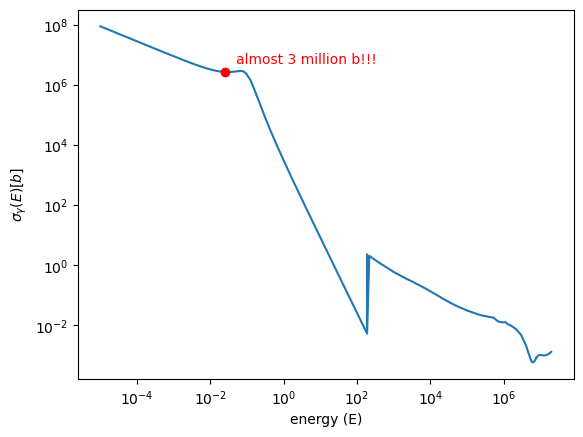

In [2]:
E, sig_Xe135 = np.loadtxt("Xe135g.txt", unpack=True, delimiter=",", skiprows=1)
plt.loglog(E, sig_Xe135)
plt.plot(0.0253, 2668930.0, 'ro')
plt.text(0.05,  5e6, "almost 3 million b!!!", color="r")
plt.xlabel('energy (E)')
plt.ylabel('$\sigma_{\gamma}(E) [b]$');

In [3]:
import sys
sys.path.append('unitcell')
from unitcell_utils import *

pwr = LWRUnitCell(fuel_radius=0.45, clad_radius=0.47, pitch=1.2, T_cool=600, T_fuel=1200)

ModuleNotFoundError: No module named 'openmc'

In [ ]:
pwr.run(np=100000)

In [ ]:
φ_Tf = pwr.flux['fuel'][1]
Σa_Tf = pwr.SigmaA['fuel'][1]
νΣf_Tf = pwr.nuSigmaF['fuel'][1]
Σf_Tf = pwr.SigmaF['fuel'][1]
φ_Tnf = pwr.flux['non-fuel'][1]
Σa_Tnf = pwr.SigmaA['non-fuel'][1]
V_f = pwr.volume['fuel']
V_nf = pwr.volume['non-fuel']

In [ ]:
φ_Tf, φ_Tnf

In [ ]:
V_f, V_nf

In [ ]:
νΣf_Tf, Σf_Tf

In [ ]:
Σa_Tf, Σa_Tnf

In [ ]:
## p here
φ_Ff = pwr.flux['fuel'][0]
Σa_Ff = pwr.SigmaA['fuel'][0]
φ_Fnf = pwr.flux['non-fuel'][0]
Σa_Fnf = pwr.SigmaA['non-fuel'][0]

p = 1  - (V_f*Σa_Ff*φ_Ff)/ \
         (V_f*(Σa_Tf*φ_Tf+Σa_Ff*φ_Ff) + V_nf*(Σa_Tnf*φ_Tnf+Σa_Fnf*φ_Fnf))   
p

In [ ]:
## epsilon here
νΣf_Ff = pwr.nuSigmaF['fuel'][0]

ɛ = (νΣf_Ff*φ_Ff + νΣf_Tf*φ_Tf)/(νΣf_Tf*φ_Tf)
ɛ

In [ ]:
λ_I135 = np.log(2)/(6.7*3600)
λ_Xe135 = np.log(2)/(9.2*3600)
γ_I135 = 0.0639
γ_Xe135 = 0.00237
σ_Xe135 = 2.6e6*1e-24 

In [ ]:
phi = 3e13

N_Xe_oo = ((γ_I135 + γ_Xe135)*Σf_Tf*phi)/(λ_Xe135+σ_Xe135*phi)
N_Xe_oo

In [ ]:
Σa_fp = σ_Xe135*N_Xe_oo

In [ ]:
k_with_Xe135 = νΣf_Tf*p*ɛ / (Σa_Tf + Σa_fp + (φ_Tnf/φ_Tf)*(V_nf/V_f)*Σa_Tnf)
k_with_Xe135

In [ ]:
k_without_Xe135 = νΣf_Tf*p*ɛ / (Σa_Tf + (φ_Tnf/φ_Tf)*(V_nf/V_f)*Σa_Tnf)
k_without_Xe135

In [ ]:
Xe_worth = (k_with_Xe135-1)/k_with_Xe135 - (k_without_Xe135-1)/k_without_Xe135
Xe_worth